# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [123]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
iris.feature_names
X.shape

(150, 4)

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [13]:
estimators = [("k_means_8",KMeans(n_clusters=8)),
              ("k_means_5",KMeans(n_clusters=5)),
              ("k_means_3",KMeans(n_clusters=3))
             ]

In [15]:
#different clusters

k_means_8 result:
 [2 1 1 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 1 1 2 2 2 1 1 2
 2 1 2 2 1 1 2 2 1 2 1 2 1 6 6 6 5 6 5 6 4 6 5 4 5 5 6 5 6 5 5 0 5 0 5 0 6
 6 6 6 6 6 4 5 4 5 0 5 6 6 6 5 5 5 6 5 4 5 5 5 6 4 5 7 0 3 7 7 3 5 3 7 3 7
 0 7 0 0 7 7 3 3 0 7 0 3 0 7 3 0 0 7 3 3 3 7 0 0 3 7 7 0 7 7 7 0 7 7 7 0 7
 7 0]
k_means_5 result:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 3 4 0 3 3 0 2 0 3 0 3
 3 3 4 3 3 3 0 0 4 3 4 0 4 3 0 4 4 3 0 0 0 3 4 4 0 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]
k_means_3 result:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2.

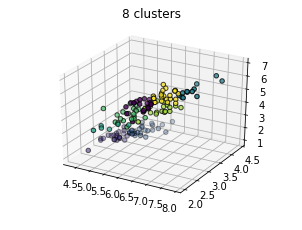

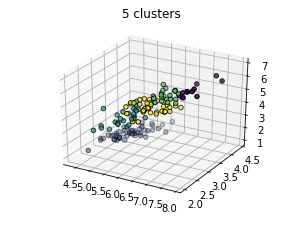

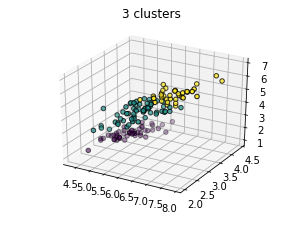

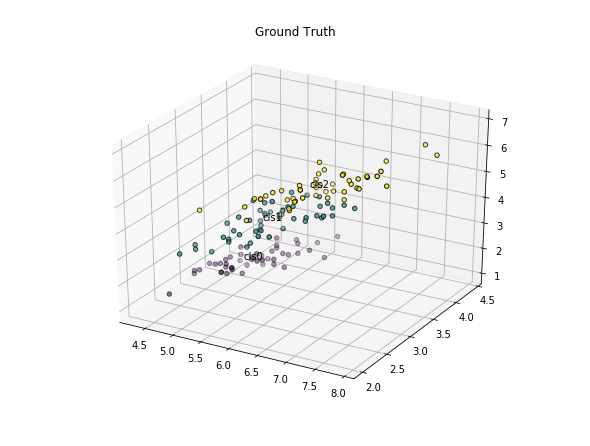

In [125]:
fignum = 1
titles = ["8 clusters","5 clusters", "3 clusters"]
for name,est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig)
    
    est.fit(X)
    
    labels = est.labels_
    if len(np.unique(labels))==3:
        labels = np.choose(labels,[0,1,2]).astype(np.float)
    print(f"{name} result:\n",labels)
    ax.scatter(X[:,0],X[:,1],X[:,2],c=labels.astype(np.float),edgecolor="k")
    
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1
fig=plt.figure(fignum, figsize=(8,6))
ax = Axes3D(fig)

for name, label in [("cls0",0),("cls1",1),("cls2",2)]:
    ax.text3D(X[y == label,0].mean(),
              X[y == label,1].mean(),
              X[y == label,2].mean(), name,
              horizontalalignment='center',
             bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
#y=np.choose(y,[1,2,0])
print("real cluster:\n",y)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, edgecolor="k")
ax.set_title("Ground Truth")
ax.dist = 12

In [ ]:
#different initial value

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


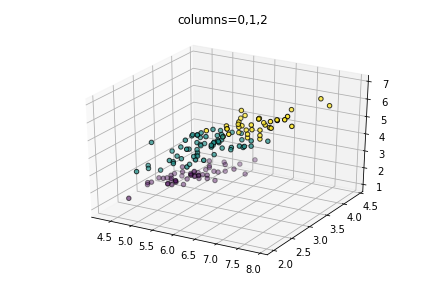

In [140]:
fig = plt.figure()
ax = Axes3D(fig)
est = estimators[2][1].fit(X)
labels = est.labels_
print(labels)
ax.scatter(X[:,0],X[:,1],X[:,2],c=labels.astype(np.float),edgecolor="k")
ax.set_title("columns=0,1,2")
ax.dist = 12

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


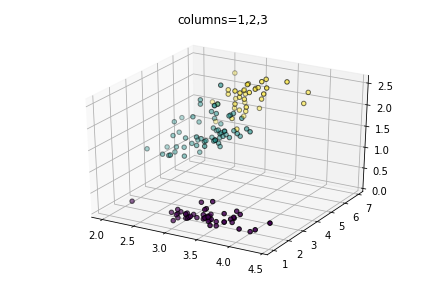

In [144]:
fig = plt.figure()
ax = Axes3D(fig)
est = estimators[2][1].fit(X)
labels = est.labels_
print(labels)
ax.scatter(X[:,1],X[:,2],X[:,3],c=labels.astype(np.float),edgecolor="k")
ax.set_title("columns=1,2,3")
ax.dist = 12

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


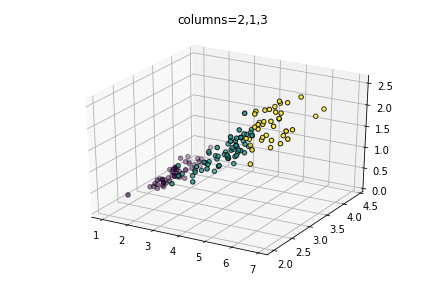

In [153]:
fig = plt.figure()
ax = Axes3D(fig)
est = estimators[2][1].fit(X)
labels = est.labels_
print(labels)
ax.scatter(X[:,2],X[:,1],X[:,3],c=labels.astype(np.float),edgecolor="k")
ax.set_title("columns=2,1,3")
ax.dist = 12